In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
from common import Fonts, Colors, add_twitter_handle, add_source

In [9]:
df = pd.DataFrame([
    [2023,9,5],
    [2019,26,18],
], columns=["year", "pks_attempted", "pks_made"])
df["pks_missed"] = df["pks_attempted"] -df["pks_made"]
df = df.drop(columns=["pks_attempted"])
df = df.set_index("year")
df

,pks_made,pks_missed
year,,
2023,5,4
2019,18,8


<Figure size 4000x3200 with 0 Axes>

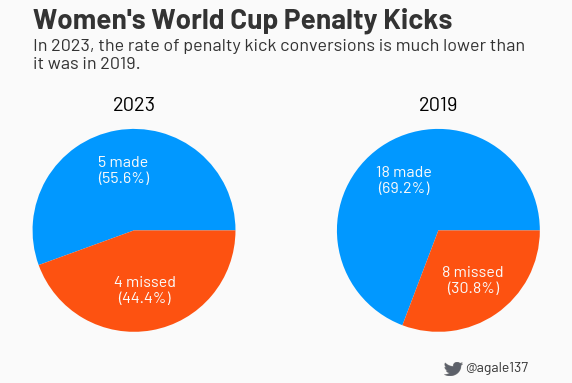

In [95]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
fig, axs = plt.subplots(1, 2)
fig.patch.set_facecolor(Colors.WHITE)

colors = ["#0198FF", "#FD5211"]


def func(pct, allvalues):
    absolute = int(pct / 100.0 * np.sum(allvalues))
    label = "missed" if pct < 50 else "made"
    return "{:d} {:s}\n({:.1f}%)".format(absolute, label, pct)

fp = Fonts.BARLOW
fp.set_size(16)

axs[0].pie(
    df.loc[2023].values,
    colors=colors,
    autopct=lambda pct: func(pct, df.loc[2023].values),
    textprops=dict(color=Colors.WHITE, fontproperties=fp),
)
axs[0].set_title("2023", fontproperties=Fonts.BARLOW, size=20, y=0.95)
wedges, texts, autotexts = axs[1].pie(
    df.loc[2019].values,
    colors=colors,
    autopct=lambda pct: func(pct, df.loc[2019].values),
    textprops=dict(color=Colors.WHITE, fontproperties=fp),
)
axs[1].set_title("2019", fontproperties=Fonts.BARLOW, size=20, y=0.95)

# Title
axs[0].text(
    -1,
    2,
    "Women's World Cup Penalty Kicks",
    fontproperties=Fonts.BARLOW_BOLD,
    color=Colors.BLACK,
    size=28,
    ha="left",
)

# Subtitle
axs[0].text(
    -1,
    1.6,
    "In 2023, the rate of penalty kick conversions is much lower than\nit was in 2019.",
    fontproperties=Fonts.BARLOW,
    color=Colors.BLACK,
    size=18,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.73, y=0.25, fs=14, w=0.025)

# Save image
plt.savefig(
    "images/world_cup_pks.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)